In [1]:
import ect
from ect_optim import ECTFilterOptimizer
import matplotlib.pyplot as plt
import numpy as np
import cv2

radius = 200
img_offset = radius/10
ect_offset = radius/5

n_knots = 20

In [2]:
def rms(x: np.ndarray) -> float:
    rms_ = np.sqrt((x*np.conj(x)).sum().sum())
    return rms_

def rmsnorm(x: np.ndarray) -> np.ndarray:
    rms = np.sqrt((x*np.conj(x)).sum().sum())
    return abs(x)/rms

def snr(image: cv2.Mat, template: cv2.Mat):
    snr_lin = (1/rms((rmsnorm(image) - rmsnorm(template))))
    return 20*np.log10(snr_lin)

In [3]:
opt = ECTFilterOptimizer(
    image_path = "../sample_imgs/white.png",
    radius = radius,
    n_knots = n_knots,
    img_offset = img_offset,
    ect_offset = ect_offset,
    loss_fcn = lambda x, y: -snr(x, y),
    do_fnf=False
)

result = opt.optim()
# result = opt.optim(method = "Nelder-Mead")
# solution = result['x'][0]


Current loss=-4.872
Current loss=-5.881
Current loss=-7.734
Current loss=-9.150
Current loss=-9.957
Current loss=-10.436
Current loss=-11.234
Current loss=-12.595
Current loss=-14.366
Current loss=-14.733
Current loss=-17.286
Current loss=-18.139
Current loss=-18.843
Current loss=-19.601
Current loss=-20.422
Current loss=-20.733
Current loss=-21.045
Current loss=-21.138
Current loss=-21.288
Current loss=-21.468
Current loss=-21.547
Current loss=-21.576
Current loss=-21.598
Current loss=-21.610
Current loss=-21.625
Current loss=-21.643
Current loss=-21.651
Current loss=-21.652
Current loss=-21.652
Current loss=-21.652
Current loss=-21.652
Current loss=-21.652
Current loss=-21.652
Current loss=-21.652
Current loss=-21.652
Current loss=-21.652
Current loss=-21.652
Current loss=-21.652
Current loss=-21.652


In [4]:
result

      fun: -21.652277146678884
 hess_inv: array([[11.52538136, -0.6861898 ,  0.19399241, -0.48713459, -0.12932438,
        -0.29452856, -0.15442276, -0.19158945, -0.14144375, -0.16054194,
        -0.10706507, -0.11251043, -0.06281723, -0.09236251, -0.03266072,
        -0.05763727, -0.05107132, -0.02970093, -0.06662703, -0.12701431],
       [-0.6861898 ,  4.75432418,  1.16215841,  1.33323267,  0.86838408,
         0.91119301,  0.69657498,  0.57990169,  0.46183597,  0.36407908,
         0.29250892,  0.2822526 ,  0.29938494,  0.21098185,  0.24254221,
         0.16900865,  0.15203523,  0.14144082,  0.22415466,  0.28983083],
       [ 0.19399241,  1.16215841,  3.67330942,  1.30481435,  1.22245181,
         0.97390926,  0.86884388,  0.69229284,  0.54906894,  0.46221152,
         0.37750271,  0.36462537,  0.3528708 ,  0.26920315,  0.29800599,
         0.20149718,  0.17692196,  0.16854982,  0.27993291,  0.36173769],
       [-0.48713459,  1.33323267,  1.30481435,  2.47500821,  0.85067515,
      

opt.loss(solution)=-21.652277146678884


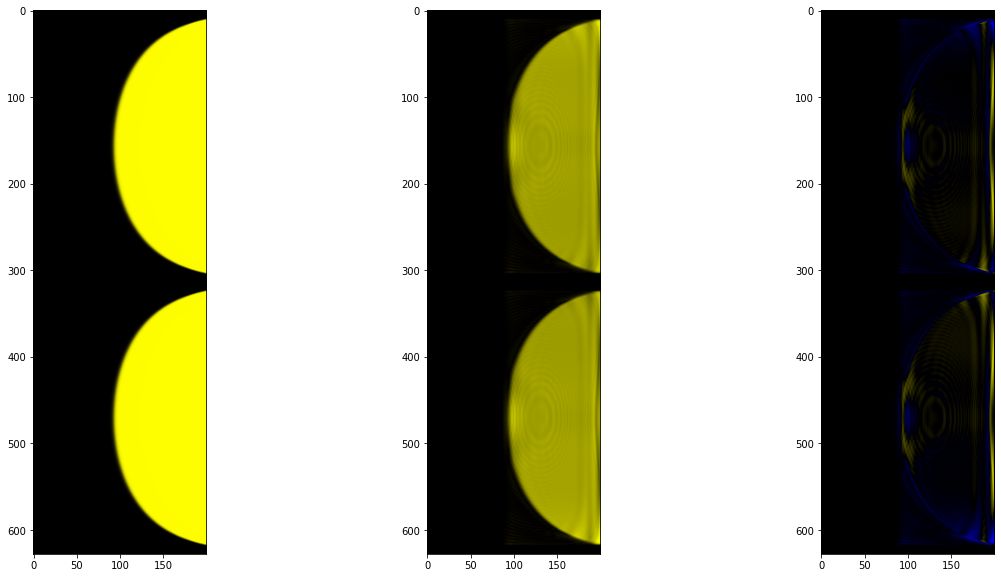

In [5]:
solution = result['x']

opt.show_result(rmsnorm)

print(f"{opt.loss(solution)=}")
# print(f"{opt.loss_sidelobe(solution)=}")

In [6]:
res = opt.inv

knots_space = solution
snf = ect.spacenorm(res.shape[:2], radius, knots_space)

print(f"{knots_space=}")

knots_space=array([3.39369103, 7.57325206, 7.06818013, 6.46019558, 5.6541489 ,
       4.87481764, 4.17500899, 3.57324543, 3.06639532, 2.63500717,
       2.26536209, 1.94454472, 1.67517332, 1.4377835 , 1.23511934,
       1.02573556, 0.91941139, 0.91647163, 1.48722188, 1.86537099])


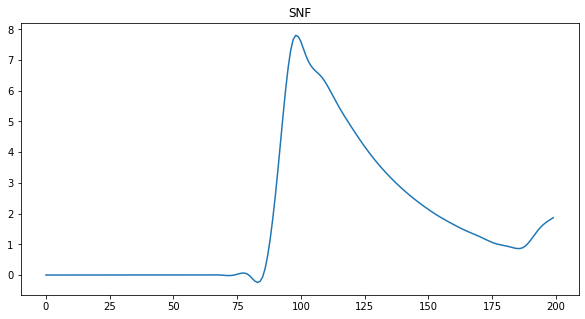

In [7]:
plt.figure(figsize=(10, 5))

# plt.subplot(1, 2, 1)
# plt.title("FNF")
# plt.plot(fnf[0,:])

# plt.subplot(1, 2, 2)
plt.title("SNF")
plt.plot(snf[0,:])

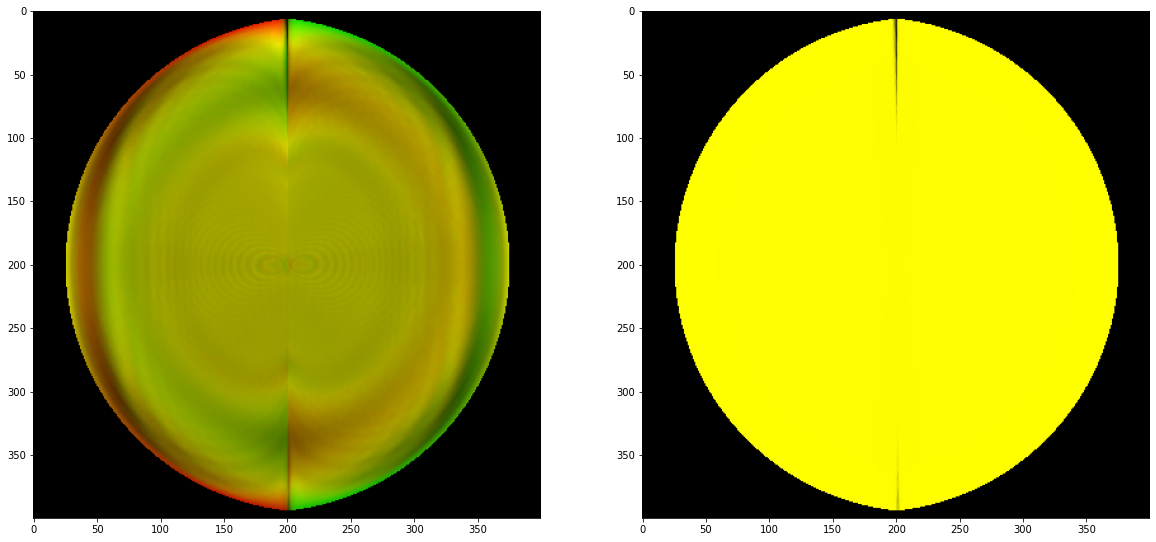

In [8]:
inv_img = ect.ilogpolar(ect.complex_to_hsv(opt.inv), radius=radius, offset=img_offset)
src_img = ect.ilogpolar(ect.complex_to_hsv(opt.image), radius=radius, offset=img_offset)

plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.imshow(inv_img)

plt.subplot(1, 2, 2)
plt.imshow(src_img)

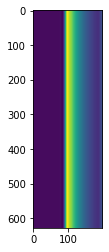

In [9]:
plt.imshow(snf)

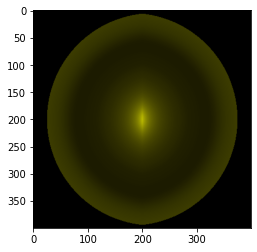

In [10]:
plt.imshow(ect.ilogpolar(ect.complex_to_hsv(snf), radius=radius, offset=img_offset))